# 第7章: 単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

## 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での[学習済み単語ベクトル](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

参考 https://radimrehurek.com/gensim/models/keyedvectors.html#how-to-obtain-word-vectors

I tried to get from [google drive](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) but I couldn't so I fetch the file from amazon aws

In [ ]:
!rm GoogleNews-vectors-negative300.bin.gz GoogleNews-vectors-negative300.bin
!wget -q https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
!gunzip GoogleNews-vectors-negative300.bin.gz

In [1]:
from gensim.models import KeyedVectors
w2v = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

unable to import 'smart_open.gcs', disabling that module


#### methods
https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.Word2VecKeyedVectors
https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.WordEmbeddingsKeyedVectors

- 使いそうなもの
    - accuracy(questions(PATH), restrict_vocab=30000, most_similar=<function WordEmbeddingsKeyedVectors.most_similar>, case_insensitive=True)
        - requires 4-tuples of words in path file
    - evaluate_word_analogies(analogies(PATH), restrict_vocab=300000, case_insensitive=True, dummy4unknown=False)
        - Compute performance of the model on an analogy test set.
        - requires 4-tuples of words in path file
    - evaluate_word_pairs(pairs(PATH), delimiter='\t', restrict_vocab=300000, case_insensitive=True, dummy4unknown=False)
        - Compute correlation of the model with human similarity judgments.
        - requires 3-tuples of words in path file
    - distance(w1, w2)
    - get_vector(word)
    - most_similar(positive=None, negative=None, topn=10, restrict_vocab=None, indexer=None)
    - rank(entity1, entity2)
    - similar_by_vector(vector, topn=10, restrict_vocab=None)
    - similar_by_word(word, topn=10, restrict_vocab=None)
    - similarity(w1, w2)

In [2]:
w2v.get_vector("United_States")

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [3]:
w2v.similarity("U.S.","United_States")

0.73107743

## 62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [4]:
w2v.similar_by_word("United_States",topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

## 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [5]:
w2v.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

## 64. アナロジーデータでの実験
[単語アナロジーの評価データ](http://download.tensorflow.org/data/questions-words.txt)をダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [7]:
!wget -q http://download.tensorflow.org/data/questions-words.txt

In [8]:
with open('questions-words.txt') as f, open('questions-words-write.txt','w') as fw:
    for line in f:
        if line[:2]==": ": fw.write(line); continue
        A, B, C, D = line.rstrip().split(" ")
        top, similarity = w2v.most_similar(positive=[B, C], negative=[A], topn=1)[0]
        fw.write("{} {} {} {} {} {}\n".format(A,B,C,D,top,similarity))

## 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [9]:
print(w2v.evaluate_word_analogies('questions-words.txt',case_insensitive=False)[0])

0.7469648230777213


In [11]:
accurate = 0
with open('questions-words-write.txt') as f:
    for i, line in enumerate(f):
        if line[:2]==": ": continue
        A, B, C, D, E, sim = line.rstrip().split(" ")
        if D == E: accurate += 1
        print("{:6f}, {} / {}".format(accurate/i,accurate,i),end="\r")

## 66. WordSimilarity-353での評価
[The WordSimilarity-353 Test Collection](http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.html)の評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

***identical numbers in the two sets do not necessarily correspond to the same individual.

In [12]:
!rm wordsim353.zip
!wget -q http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip -n wordsim353.zip

rm: cannot remove 'wordsim353.zip': No such file or directory
Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  inflating: set2.csv                
  inflating: combined.tab            
  inflating: set1.tab                
  inflating: set2.tab                
  inflating: instructions.txt        


In [3]:
import pandas as pd

In [7]:
def tmp(fname, wfname):
    df = pd.read_csv(fname)
    df['w2v_r'] = df.apply(lambda w: w2v.rank(w['Word 1'],w['Word 2']), axis=1)
    df['w2v_l'] = df.apply(lambda w: w2v.rank(w['Word 2'],w['Word 1']), axis=1)
    df.to_csv(wfname,index=False)
tmp('set1.csv','set1_w2v.csv')
tmp('set2.csv','set2_w2v.csv')

$\displaystyle piason:r_{xy} =\frac{S_{xy}}{\sqrt{S_xS_Y}}=\frac{\frac{1}{n}\sum_i{(x_i-\bar{x})(y_i-\bar{y})}}{\sqrt{\frac{1}{n}\sum_i{(x_i-\bar{x})^2}\frac{1}{n}\sum_i{(y_i-\bar{y})^2}}}=\frac{\frac{1}{n}\sum_i{(x_iy_i-\bar{x}\bar{y})}}{\sqrt{\frac{1}{n}\sum_i{(x_i^2-\bar{x}^2)}\frac{1}{n}\sum_i{(y_i^2-\bar{y}^2)}}}
=\frac{\sum_i\frac{x_iy_i}{n}-\sum_i\frac{x_i}{n}\sum_i\frac{y_i}{n}}{\sqrt{(\sum_i\frac{x_i^2}{n}-(\sum_i\frac{x_i}{n})^2)(\sum_i\frac{y_i^2}{n}-(\sum_i\frac{y_i}{n})^2)}}$


ここで、$\sum_i{x_i}=\sum_i{y_i}=\frac{n(n+1)}{2}, \sum_i{x_i^2}=\sum_i{y_i^2}=\frac{n(n+1)(2n+2)}{6}$とすれば、


$\displaystyle spiaman:r_{xy}=\frac{\sum_i\frac{x_iy_i}{n}-\frac{(n+1)^2}{4}}{\frac{(n+1)(2n+1)}{6}-\frac{(n+1)^2}{4}}$

$\displaystyle=\frac{12\sum_i{x_iy_i}-3n(n+1)^2}{n(n^2-1)}=\frac{12\sum_i{x_iy_i}-(3n(n+1)^2-n(n^2-1)+n(n^2-1))}{n(n^2-1)}=\frac{12\sum_i{x_iy_i}-(2n(n+1)(2n+1)+n(n^2-1))}{n(n^2-1)}$

$\displaystyle=1+\frac{12\sum_i{x_iy_i}-2n(n+1)(2n+1)}{n(n^2-1)}=1+\frac{12\sum_i{x_iy_i}-6\sum_i{x_i^2}-6\sum_i{y_i^2}}{n(n^2-1)}=1-\frac{6\sum_i{(x_i-y_i)^2}}{n(n^2-1)}$

※ スピアマン相関係数は比較する際に1元的な順位へと置き換えるべき($\sum{x_i}=\frac{n(n+1)}{2}$等の前提を利用するため)

In [4]:
wordsim_1 = pd.read_csv('set1_w2v.csv')
wordsim_2 = pd.read_csv('set2_w2v.csv')
pd.set_option('display.max_columns', 30)

In [5]:
import math
def trim(df):
    return df.loc[:,('0'<=df.columns.str[0]) & (df.columns.str[0]<='9')]
def calc(series,df,f):
    return pd.Series([f(series,df['w2v_r']),f(series,df['w2v_l']),f(series,(df['w2v_r']+df['w2v_l'])/2)],index=['right','left','mean'])
def Spearman(x,y):
    if len(x)!=len(y): raise Exception("size of x and y must be same.")
    return 1-sum([(xi-yi)**2 for xi,yi in zip(x,y)])*6/len(x)/(len(x)^2-1)
def Pearson(x,y):
    if len(x)!=len(y): raise Exception("size of x and y must be same.")
    xb = sum(x)/len(x); yb = sum(y)/len(y); xxb = sum(x**2)/len(x); yyb = sum(y**2)/len(y)
    return (sum([xi*yi for xi,yi in zip(x,y)])/len(x)-xb*yb) / (math.sqrt((xxb-xb**2)*(yyb-yb**2)))

+ スピアマンで一応

In [6]:
trim(wordsim_1).apply(lambda x:calc(x,wordsim_1,Spearman),result_type="expand")

,1,2,3,4,5,6,7,8,9,10,11,12,13
right,-1.687550e+10,-1.687552e+10,-1.687555e+10,-1.687555e+10,-1.687554e+10,-1.687554e+10,-1.687557e+10,-1.687557e+10,-1.687556e+10,-1.687557e+10,-1.687553e+10,-1.687557e+10,-1.687557e+10
left,-1.734218e+10,-1.734220e+10,-1.734222e+10,-1.734222e+10,-1.734222e+10,-1.734222e+10,-1.734225e+10,-1.734225e+10,-1.734224e+10,-1.734224e+10,-1.734220e+10,-1.734225e+10,-1.734224e+10
mean,-1.684660e+10,-1.684661e+10,-1.684664e+10,-1.684664e+10,-1.684663e+10,-1.684663e+10,-1.684667e+10,-1.684666e+10,-1.684665e+10,-1.684666e+10,-1.684662e+10,-1.684667e+10,-1.684666e+10


In [7]:
trim(wordsim_2).apply(lambda x:calc(x,wordsim_2,Spearman),result_type="expand")

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
right,-9.959273e+09,-9.959317e+09,-9.959286e+09,-9.959312e+09,-9.959270e+09,-9.959288e+09,-9.959315e+09,-9.959292e+09,-9.959316e+09,-9.959298e+09,-9.959302e+09,-9.959297e+09,-9.959293e+09,-9.959310e+09,-9.959272e+09,-9.959299e+09
left,-1.018277e+10,-1.018282e+10,-1.018278e+10,-1.018281e+10,-1.018276e+10,-1.018278e+10,-1.018281e+10,-1.018279e+10,-1.018281e+10,-1.018280e+10,-1.018280e+10,-1.018279e+10,-1.018279e+10,-1.018281e+10,-1.018277e+10,-1.018280e+10
mean,-9.756405e+09,-9.756449e+09,-9.756419e+09,-9.756444e+09,-9.756400e+09,-9.756419e+09,-9.756447e+09,-9.756424e+09,-9.756447e+09,-9.756430e+09,-9.756434e+09,-9.756429e+09,-9.756426e+09,-9.756441e+09,-9.756403e+09,-9.756430e+09


+ ピアソン

In [8]:
trim(wordsim_1).apply(lambda x:calc(x,wordsim_1,Pearson),result_type="expand")

,1,2,3,4,5,6,7,8,9,10,11,12,13
right,-0.562715,-0.475703,-0.620895,-0.554495,-0.353812,-0.678381,-0.683313,-0.620428,-0.634369,-0.544170,-0.437468,-0.547112,-0.603471
left,-0.558293,-0.464705,-0.617768,-0.523332,-0.366412,-0.637644,-0.666215,-0.623811,-0.631209,-0.542827,-0.408290,-0.544441,-0.595173
mean,-0.566071,-0.474854,-0.625487,-0.544192,-0.363731,-0.664450,-0.681433,-0.628321,-0.639079,-0.548905,-0.427008,-0.551202,-0.605265


In [9]:
trim(wordsim_2).apply(lambda x:calc(x,wordsim_2,Pearson),result_type="expand")

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
right,-0.325669,-0.399663,-0.313496,-0.285563,-0.203311,-0.364148,-0.290892,-0.376048,-0.352637,-0.323906,-0.306278,-0.394912,-0.338288,-0.182783,-0.394668,-0.359312
left,-0.383933,-0.440455,-0.369470,-0.313555,-0.187152,-0.395339,-0.324992,-0.420095,-0.381215,-0.368651,-0.333927,-0.418002,-0.389149,-0.199978,-0.413949,-0.384440
mean,-0.362560,-0.429134,-0.348950,-0.306026,-0.199311,-0.387925,-0.314611,-0.406693,-0.374825,-0.353803,-0.327004,-0.415174,-0.371637,-0.195509,-0.412964,-0.379867


## 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

参考 https://qiita.com/kujirahand/items/bdc574102148c7f1f041

In [10]:
countries = set()
flg = False
with open('questions-words.txt') as f:
    for line in f:
        line = line.rstrip()
        if line[:2] == ": ":
            if line[2:] == "capital-common-countries": flg=True
            else: flg=False
            continue
        if not flg: continue
        countries.add(line.split()[1])
        countries.add(line.split()[3])
print(countries)

{'Sweden', 'Norway', 'Greece', 'Cuba', 'Germany', 'France', 'Egypt', 'Iran', 'Australia', 'England', 'China', 'Afghanistan', 'Russia', 'Switzerland', 'Italy', 'Iraq', 'Spain', 'Thailand', 'Finland', 'Japan', 'Canada', 'Vietnam', 'Pakistan'}


In [11]:
country_df = pd.DataFrame([[country,w2v.get_vector(country)] for country in countries],columns=['country','vector'])

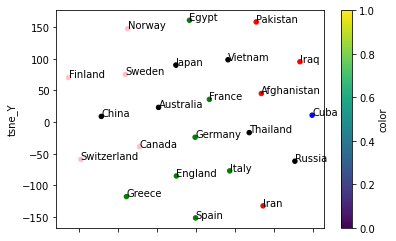

In [13]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
km = KMeans(n_clusters=5, random_state=0).fit(list(country_df['vector']))
tsne = TSNE(n_components=2,random_state=0).fit(list(country_df['vector']))
country_df['label'] = km.labels_
country_df['color'] = country_df['label'].apply(lambda x:['red','green','pink','blue','black'][x])
country_df['tsne_X'] = tsne.embedding_.T[0]
country_df['tsne_Y'] = tsne.embedding_.T[1]
scatter = country_df.plot.scatter(x='tsne_X',y='tsne_Y',c='color')
for _,v in country_df.iterrows():
    scatter.annotate(v['country'],xy=(v['tsne_X'],v['tsne_Y']))

## 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

参考 https://gomiba.co.in/blog/archives/705

[]

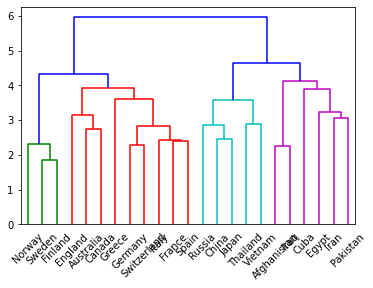

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
linkage_result = linkage(country_df['vector'].tolist(), method='ward', metric='euclidean')
dendrogram(linkage_result, labels=list(country_df['country']))
plt.plot()

## 69. t-SNEによる可視化
国名に関する単語ベクトルのベクトル空間をt-SNEで可視化せよ．

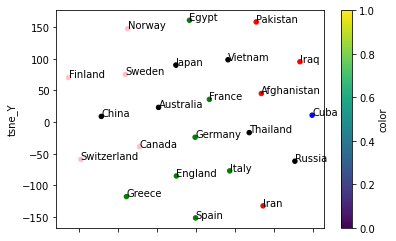

In [19]:
km = KMeans(n_clusters=5, random_state=0).fit(list(country_df['vector']))
tsne = TSNE(n_components=2,random_state=0).fit(list(country_df['vector']))
country_df['label'] = km.labels_
country_df['color'] = country_df['label'].apply(lambda x:['red','green','pink','blue','black'][x])
country_df['tsne_X'] = tsne.embedding_.T[0]
country_df['tsne_Y'] = tsne.embedding_.T[1]
scatter = country_df.plot.scatter(x='tsne_X',y='tsne_Y',c='color')
for _,v in country_df.iterrows():
    scatter.annotate(v['country'],xy=(v['tsne_X'],v['tsne_Y']))